In [118]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [119]:
# загружаем датасет
data = pd.read_excel('data/data_ford_price.xlsx') 

### Предобработка данных

In [120]:
data = data[['price','year', 'cylinders', 'odometer', 'lat', 'long', 'weather']]
data.dropna(inplace = True)

y = data['price']
x = data.drop(columns='price')

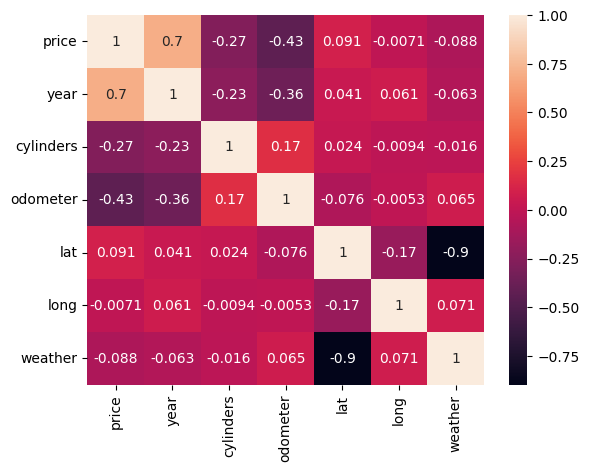

In [121]:
sns.heatmap(data.corr(),annot=True);

In [122]:
# Удаление избыточного признака
x.drop('lat', axis = 1, inplace = True)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

### Обучение модели

In [124]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_predicted = linear_model.predict(X_test)

Будем смотреть, как поведет себя метрика $R^2$ наборах данных

In [125]:
print(f'Метрика R2 на всех признаках равна {r2_score(y_test, y_predicted):.2f}')

Метрика R2 на всех признаках равна 0.61


### Метод рекурсивного исключения признаков

In [126]:
from sklearn.feature_selection import RFE

In [127]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)

rfe_cols = list(selector.get_feature_names_out())
print(rfe_cols)
selector.ranking_

['year', 'cylinders', 'weather']


array([1, 1, 3, 2, 1])

In [128]:
X_train_rfe = X_train[rfe_cols]
X_test_rfe = X_test[rfe_cols]

linear_model.fit(X_train_rfe, y_train)
y_predicted_rfe = linear_model.predict(X_test_rfe)

In [129]:
print(f'Метрика R2 на 3х признаках, выбранных методом рекурсивного исключения {r2_score(y_test, y_predicted_rfe):.2f}')

Метрика R2 на 3х признаках, выбранных методом рекурсивного исключения 0.57


###  МЕТОДЫ ВЫБОРА ПРИЗНАКОВ НА ОСНОВЕ ФИЛЬТРОВ

In [130]:
from sklearn.feature_selection import SelectKBest, f_regression

In [131]:
selector = SelectKBest(f_regression, k=3)
selector.fit(X_train, y_train)
 
skb_cols = list(selector.get_feature_names_out())
print(skb_cols)

['year', 'cylinders', 'odometer']


In [132]:
X_train_skb = X_train[skb_cols]
X_test_skb = X_test[skb_cols]

linear_model.fit(X_train_skb, y_train)
y_predicted_skb = linear_model.predict(X_test_skb)

In [133]:
print(f'Метрика R2 на 3х признаках, выбранных методом на основе фильтров {r2_score(y_test, y_predicted_skb):.2f}')

Метрика R2 на 3х признаках, выбранных методом на основе фильтров 0.60


Вывод: исходя из 3х полученных метрик можно заметить, что самая большая (0.61) получилась на датасете из всех (из 5ти) признаков. Ближе всего из метрик, вычисленных лишь на 3х признаках оказалась метрика метода *SelectKBest* - 0.6.
Данный метод побеждает в номинации *«Какой метод отбора признаков показал наилучший результат на тестовой выборке?»*

То что наибольшее значение метрики у полного датасета можно объяснить тем, что сам датасет и так неммного признаков и модель не уловила никие лишние закономерности